<a href="https://colab.research.google.com/github/diegompin/mtsa/blob/feature%2Fv0.0.8/examples/MTSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MTSA - **M**ultiple **T**ime **S**eries **A**nalysis


### Installing MTSA module:

In [ ]:
!pip install mtsa

### Cloning MTSA repository:

*Obs: This step is necessary to access the example data.*

In [ ]:
!git clone https://github.com/diegompin/mtsa.git

### Setting data directory:

In [1]:
%load_ext autoreload
%autoreload 2

In [36]:
import os
path_input_1 = os.path.join(os.getcwd(),  "sample_data", "machine_type_1", "id_00")
path_input_2 = os.path.join(os.getcwd(),  "mtsa", "examples", "sample_data", "machine_type_1", "id_00")

path_input_fan_id_00 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "fan", "id_00")
path_input_fan_id_02 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "fan", "id_02")
path_input_fan_id_04 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "fan", "id_04")
path_input_fan_id_06 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "fan", "id_06")

path_input_pump_id_00 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "pump", "id_00")
path_input_pump_id_02 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "pump", "id_02")
path_input_pump_id_04 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "pump", "id_04")
path_input_pump_id_06 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "pump", "id_06")

path_input_slider_id_00 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "slider", "id_00")
path_input_slider_id_02 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "slider", "id_02")
path_input_slider_id_04 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "slider", "id_04")
path_input_slider_id_06 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "slider", "id_06")

path_input_valve_id_00 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "valve", "id_00")
path_input_valve_id_02 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "valve", "id_02")
path_input_valve_id_04 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "valve", "id_04")
path_input_valve_id_06 = os.path.join(os.getcwd(),  "..", "..", "..", "MIMII", "valve", "id_06")

In [3]:
import torch
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
assert len(gpus) > 0, "Not enough GPU hardware devices available"
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

2024-09-28 22:07:16.751119: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-28 22:07:17.467495: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-09-28 22:07:17.467545: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-09-28 22:07:17.467551: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

AssertionError: Not enough GPU hardware devices available

In [3]:
import sys
sys.path.append("..")

In [ ]:
%load_ext autoreload
%autoreload 2

### Reading Data Files:

In [4]:
from mtsa import calculate_aucroc

2024-09-29 13:04:16.199479: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-29 13:04:17.941804: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-09-29 13:04:17.943822: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-09-29 13:04:17.943829: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [37]:
from mtsa import files_train_test_split
#path_input_1 = '/data/MIMII/fan/id_00/'
X_train, X_test, y_train, y_test = files_train_test_split(path_input_fan_id_06)
#if(len(y_train) == 0): 
#   X_train, X_test, y_train, y_test = files_train_test_split(path_input_2)
print(f"X_train: {X_train}")
print(f"y_train: {y_train}")

X_train: ['/data/joao/mtsa/examples/../../../MIMII/fan/id_06/normal/00000982.wav'
 '/data/joao/mtsa/examples/../../../MIMII/fan/id_06/normal/00000771.wav'
 '/data/joao/mtsa/examples/../../../MIMII/fan/id_06/normal/00000020.wav'
 '/data/joao/mtsa/examples/../../../MIMII/fan/id_06/normal/00000617.wav'
 '/data/joao/mtsa/examples/../../../MIMII/fan/id_06/normal/00000200.wav'
 '/data/joao/mtsa/examples/../../../MIMII/fan/id_06/normal/00000281.wav'
 '/data/joao/mtsa/examples/../../../MIMII/fan/id_06/normal/00000287.wav'
 '/data/joao/mtsa/examples/../../../MIMII/fan/id_06/normal/00000351.wav'
 '/data/joao/mtsa/examples/../../../MIMII/fan/id_06/normal/00000414.wav'
 '/data/joao/mtsa/examples/../../../MIMII/fan/id_06/normal/00000408.wav'
 '/data/joao/mtsa/examples/../../../MIMII/fan/id_06/normal/00000421.wav'
 '/data/joao/mtsa/examples/../../../MIMII/fan/id_06/normal/00000844.wav'
 '/data/joao/mtsa/examples/../../../MIMII/fan/id_06/normal/00000462.wav'
 '/data/joao/mtsa/examples/../../../MIMII/

In [63]:
print(f"Conjunto de Treinamento: {X_train.shape}, Labels: {y_train.shape}")
print(f"Conjunto de Teste: {X_test.shape}, Labels: {y_test.shape}")

Conjunto de Treinamento: (654,), Labels: (654,)
Conjunto de Teste: (722,), Labels: (722,)


### MFFCMix Model:

In [9]:
#from mtsa import MFCCMix
#model_mfccmix = MFCCMix()
#model_mfccmix.fit(X_train, y_train)
#model_mfccmix.model

Pipeline(steps=[('wav2array', Wav2Array()),
                ('array2mfcc', Array2Mfcc(sampling_rate=None)),
                ('features',
                 FeatureUnion(transformer_list=[('M',
                                                 MagnitudeMeanFeatureMfcc()),
                                                ('S',
                                                 MagnitudeStdFeatureMfcc()),
                                                ('C',
                                                 CorrelationFeatureMfcc())])),
                ('final_model', GaussianMixture())])

In [10]:
#auc = calculate_aucroc(model_mfccmix, X_test, y_test)
#auc

0.8609356895665318

### IForest Model: Fan


In [60]:
from mtsa import IForest

model_isolationforest = IForest(n_estimators=100, contamination=0.1, max_samples=256, max_features=1.0)
model_isolationforest.model

Pipeline(steps=[('wav2array', Wav2Array()),
                ('array2mfcc', Array2Mfcc(sampling_rate=None)),
                ('features',
                 FeatureUnion(transformer_list=[('M',
                                                 MagnitudeMeanFeatureMfcc()),
                                                ('S',
                                                 MagnitudeStdFeatureMfcc()),
                                                ('C',
                                                 CorrelationFeatureMfcc())])),
                ('final_model',
                 IsolationForest(contamination=0.1, max_samples=256))])

In [62]:
import time
import pandas as pd

results = []

def train_and_evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    training_duration = end_time - start_time
    auc = calculate_aucroc(model, X_test, y_test)
    
    print(f"Tempo de Treinamento: {training_duration:.2f} segundos, AUC-ROC: {auc:.4f}, modelo: {model_name}")
    
    results.append({
        "model_name": model_name,
        "n_estimators": model.n_estimators,
        "contamination": model.contamination,
        "max_samples": model.max_samples,
        "max_features": model.max_features,
        "training_time": training_duration,
        "auc_roc": auc
    })

folder_path = '/data/joao/mtsa/experiments'

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

train_and_evaluate_model(model_isolationforest, "IsolationForest_50_estimators", X_train, X_test, y_train, y_test)

df_results = pd.DataFrame(results)

file_path = os.path.join(folder_path, 'isolationforest_Fan_id_06_with_Array2Mfcc_and_features.csv')
df_results.to_csv(file_path, index=False)

print(f"Resultados salvos em {file_path}")

Tempo de Treinamento: 93.65 segundos, AUC-ROC: 0.6714, modelo: IsolationForest_50_estimators
Resultados salvos em experiments/isolationforest_Fan_id_06_with_Array2Mfcc_and_features.csv


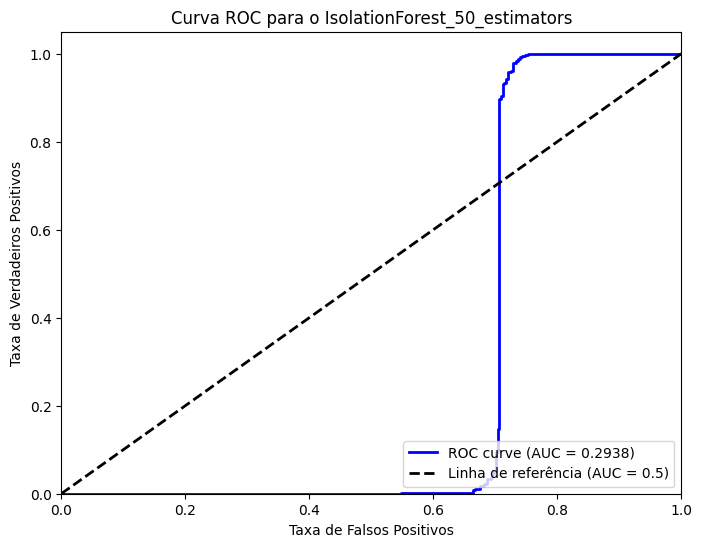

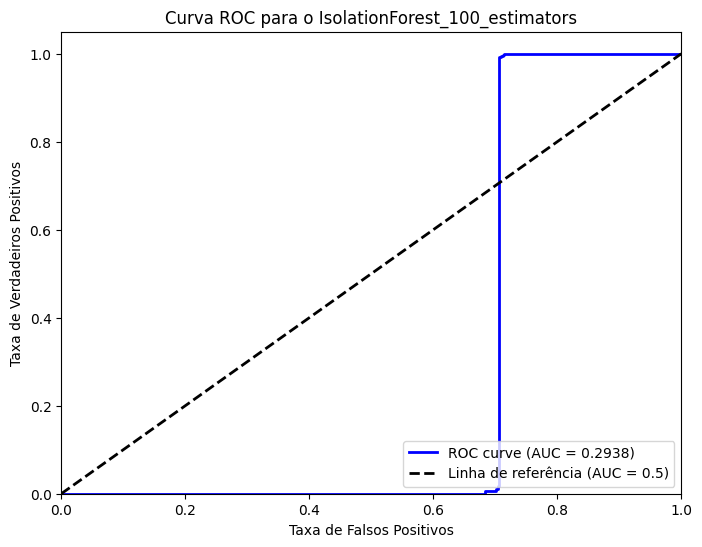

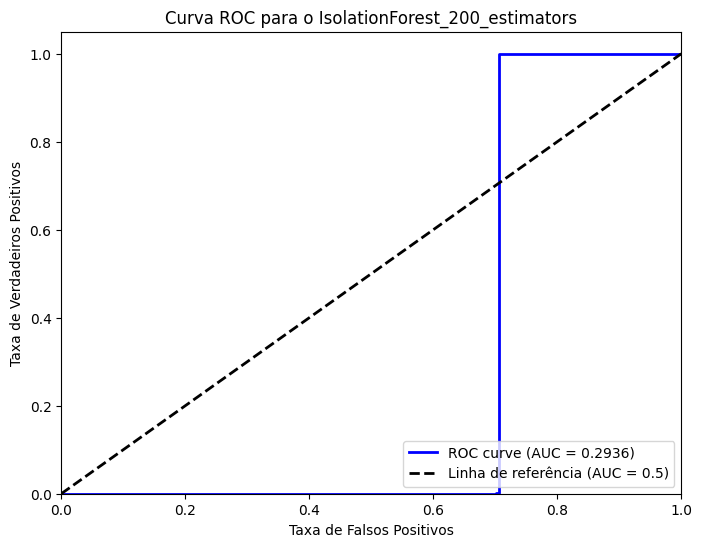

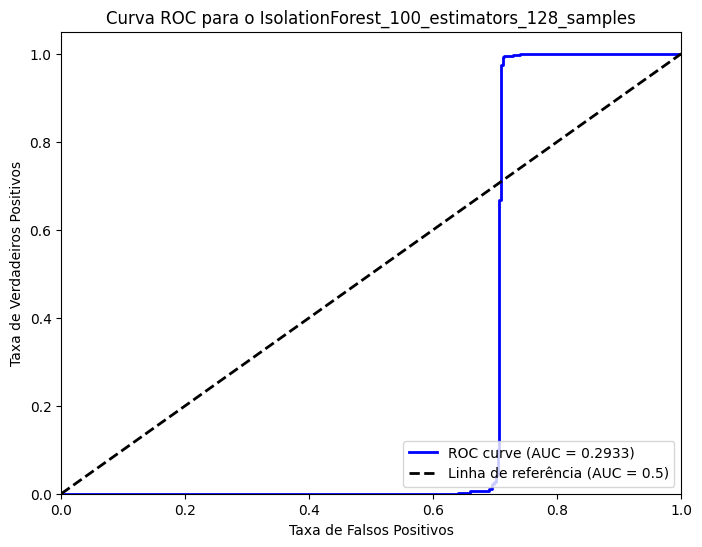

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_test, y_test, model_name):
    y_pred_prob = model.score_samples(X_test) 

    fpr, tpr = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='Linha de referência (AUC = 0.5)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title(f'Curva ROC para o {model_name}')
    plt.legend(loc='lower right')
    plt.show()

plot_roc_curve(model_isolationforest, X_test, y_test, "IsolationForest_50_estimators")
#plot_roc_curve(model_isolationforest2, X_test, y_test, "IsolationForest_100_estimators")
#plot_roc_curve(model_isolationforest3, X_test, y_test, "IsolationForest_200_estimators")
#plot_roc_curve(model_isolationforest4, X_test, y_test, "IsolationForest_100_estimators_128_samples")


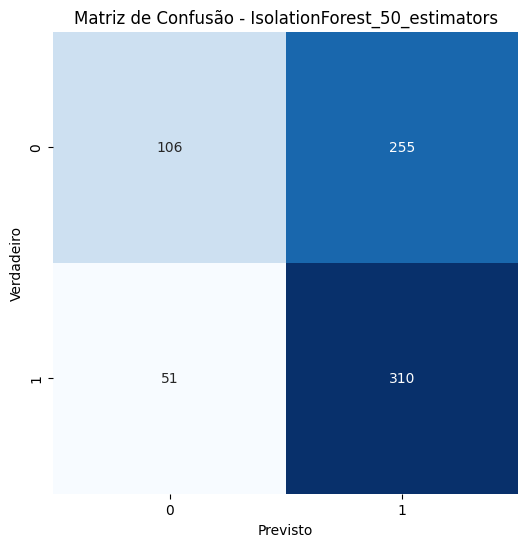

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.xlabel('Previsto')
    plt.ylabel('Verdadeiro')
    plt.show()

plot_confusion_matrix(model_isolationforest, X_test, y_test,"IsolationForest_50_estimators")


### Hitachi Model:

In [ ]:
from mtsa import Hitachi
model_hitachi = Hitachi()
model_hitachi.fit(X_train, y_train)
model_hitachi.model

In [ ]:
auc = calculate_aucroc(model_hitachi, X_test, y_test)
auc

### GANF Model:

In [ ]:
from mtsa.models.ganf import GANF
model_GANF = GANF()

In [ ]:
model_GANF.fit(X_train, y_train)
model_GANF.model

In [ ]:
auc = calculate_aucroc(model_GANF, X_test, y_test)
auc

### RANSynCoders Model:

In [ ]:
from mtsa import RANSynCoders
model_ransyncorders = RANSynCoders(is_acoustic_data=True, mono=True, normal_classifier=1, abnormal_classifier=0, synchronize=True)
model_ransyncorders.fit(X_train, y_train)

In [ ]:
auc = calculate_aucroc(model_ransyncorders, X_test, y_test)
auc